In [453]:
import numpy as np
import pandas as pd
%pylab inline 
import h5py
from tqdm import tqdm
from sklearn import preprocessing
from sklearn import decomposition
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.random_projection import SparseRandomProjection
from scipy.sparse import load_npz, save_npz
from scipy.stats import pearsonr
import scipy.stats
import pandas as pd
import sklearn
import h5py
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
import pickle
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import json, urllib
import plotly
plotly.tools.set_credentials_file(username='james20141606', api_key='L3zPyULntDsWb4XC4fGS')
import plotly.plotly as py
from plotly.graph_objs import Scatter, Layout

Populating the interactive namespace from numpy and matplotlib


In [454]:
cd /home/chenxupeng/projects/mcm/

/home/chenxupeng/projects/mcm


In [455]:
table = pd.read_excel('problemCdata/ProblemCData.xlsx')

In [456]:
msncode = table['MSN'].unique()

In [457]:
table['StateCode'].unique()

array([u'AZ', u'CA', u'NM', u'TX'], dtype=object)

In [458]:
table_az = table[table['StateCode'] =='AZ']
table_ca = table[table['StateCode'] =='CA']
table_nm = table[table['StateCode'] =='NM']
table_tx = table[table['StateCode'] =='TX']

In [459]:
def create_state_array(table_state):
    table = table_state
    state_array = np.ndarray([583,50])
    for i in tqdm(range(583)):
        row = np.array(table_az[table_az['MSN'] ==msncode[i]].iloc[:,3:]).ravel()
        nanarr = np.repeat(np.nan,50-row.shape[0])
        state_array[i] = np.concatenate((nanarr,row))
    return state_array

In [24]:
state_array_az = create_state_array(table_az)

100%|██████████| 583/583 [00:01<00:00, 364.05it/s]


min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit_transform(state_array_az[0:1,10:])

def standardize(array):
    array_trans = np.ndarray([array.shape[0],array.shape[1]])
    for i in range(array.shape[0]):
        row = min_max_scaler.fit_transform(array[i][~np.isnan(array[i])].reshape(1,-1)).ravel()
        nanarr = np.repeat(np.nan,50-row.shape[0])
        array_trans[i] = np.concatenate((nanarr,row))
    return array_trans

array_trans_az = standardize(state_array_az)

np.savetxt('problemCdata/state_array_az.txt',state_array_az)
np.savetxt('problemCdata/array_trans_az.txt',array_trans_az)

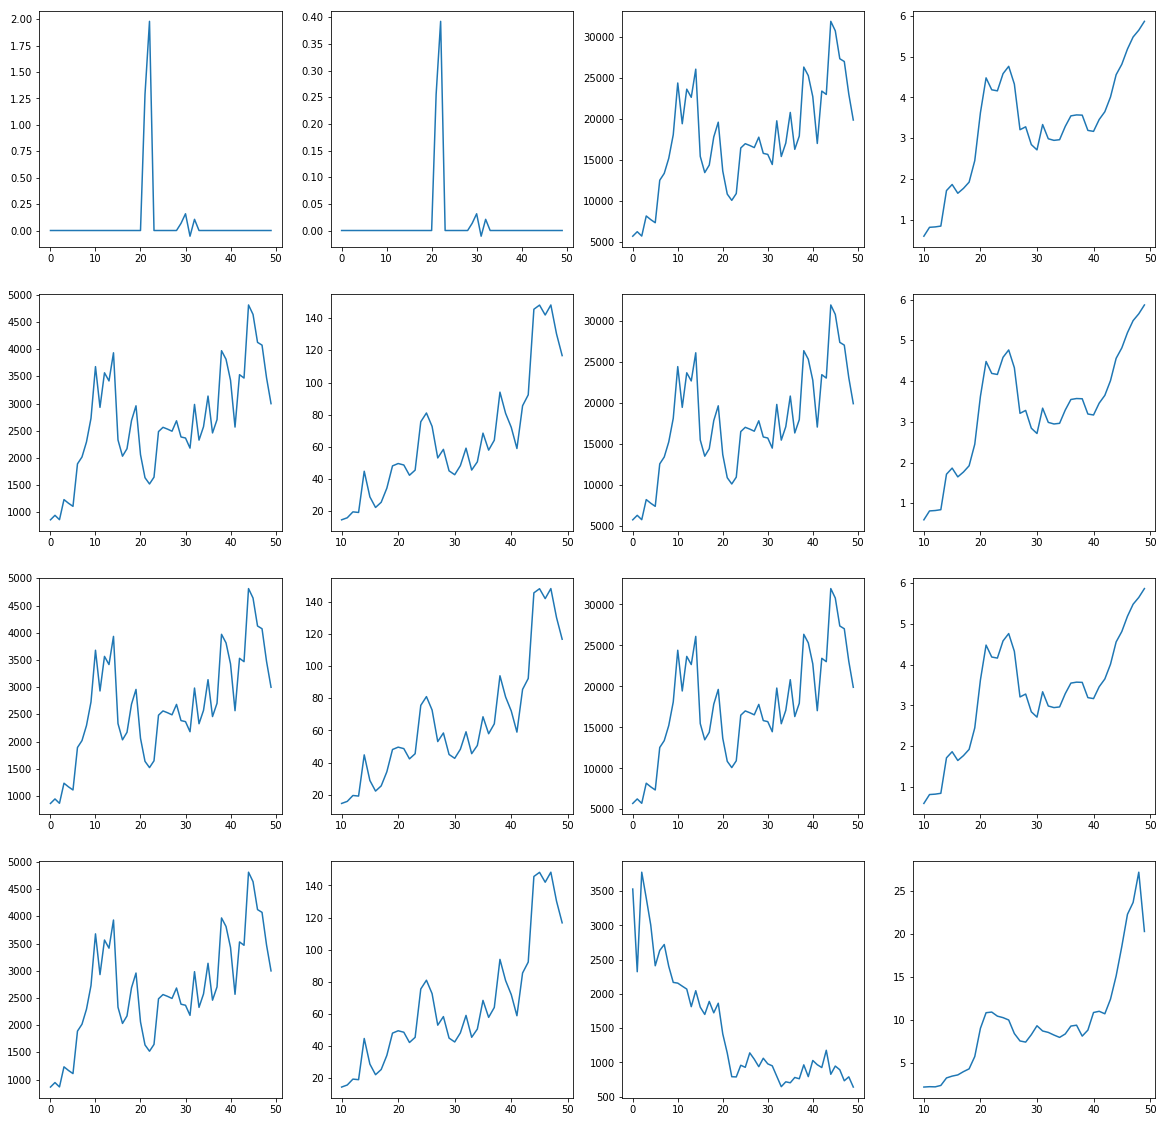

In [25]:
fig, ax = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].plot(state_array_az[i*4+j])

In [144]:
pcc = []
for i in range(583):
    for j in np.arange(i+1,583):
        pcc.append(pearsonr(state_array_az[i],state_array_az[j]))

/home/chenxupeng/apps/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [149]:
pcc = np.array(pcc)

In [151]:
pcc[:,0]

array([ 1.        , -0.22666167,  0.1872592 , ...,  1.        ,
        1.        ,  1.        ])

In [152]:
np.percentile(pcc[:,0])

array([-0.96468835, -0.96233732, -0.96171792, ...,         nan,
               nan,         nan])

In [163]:
np.sort(pcc[:,0][~np.isnan(pcc[:,0])])[-5000:]

array([ 0.96322189,  0.9632517 ,  0.96327938, ...,  1.        ,
        1.        ,  1.        ])

(array([   23.,   233.,   157.,   115.,    98.,   211.,   220.,   334.,
          397.,   423.,   368.,   302.,   286.,   307.,   408.,   381.,
          194.,   291.,   253.,   267.,   230.,   278.,   323.,   267.,
          393.,   404.,   648.,   634.,   792.,   817.,   924.,  1192.,
         1456.,  1540.,  1708.,  1659.,  1754.,  1741.,  1856.,  1845.,
         1701.,  1755.,  1665.,  1796.,  1948.,  1931.,  1830.,  1717.,
         1977.,  1675.,  1508.,  1611.,  1451.,  1543.,  1446.,  1432.,
         1540.,  1511.,  1475.,  1414.,  1579.,  1520.,  1524.,  1609.,
         1572.,  1544.,  1602.,  1802.,  1663.,  1852.,  1961.,  1904.,
         1996.,  1905.,  1847.,  1932.,  1943.,  2257.,  2392.,  2510.,
         2402.,  2309.,  2054.,  2146.,  2056.,  2189.,  2304.,  2209.,
         2154.,  2145.,  2190.,  2322.,  2664.,  2565.,  2477.,  3025.,
         2964.,  2813.,  2830.,  2529.]),
 array([-0.96468835, -0.94504147, -0.92539459, -0.9057477 , -0.88610082,
        -0.86645394, 

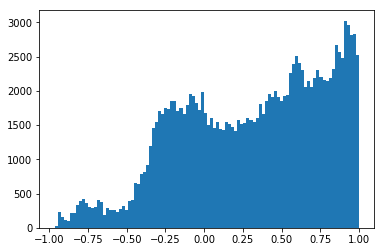

In [168]:
hist(pcc[:,0][~np.isnan(pcc[:,0])],bins = 100)

In [166]:
(pcc[:,0][~np.isnan(pcc[:,0])] ==1).sum()

148

In [460]:
msncode = np.unique(np.array(table['MSN'])).astype(str)

In [461]:
msncode_ = np.ndarray([msncode.shape[0],3]).astype('str')
for i in range(msncode.shape[0]):
    msncode_[i,0] = msncode[i][:2]
    msncode_[i,1] = msncode[i][2:4]
    msncode_[i,2] = msncode[i][4:]

In [462]:
np.unique(msncode_[:,0])

array(['AB', 'AR', 'AV', 'BM', 'CL', 'CO', 'DF', 'DK', 'EL', 'EM', 'EN',
       'ES', 'FF', 'FN', 'FO', 'FS', 'GD', 'GE', 'GO', 'HY', 'JF', 'JK',
       'JN', 'KS', 'LG', 'LO', 'LU', 'MB', 'MG', 'MM', 'MS', 'NA', 'NG',
       'NN', 'NU', 'P1', 'P5', 'PA', 'PC', 'PE', 'PL', 'PM', 'PO', 'PP',
       'RE', 'RF', 'RO', 'SF', 'SG', 'SN', 'SO', 'TE', 'TN', 'TP', 'UO',
       'US', 'WD', 'WS', 'WW', 'WX', 'WY'],
      dtype='|S32')

table_ = pd.concat((table,pd.DataFrame(tablecode)),axis =1)

In [201]:
table_.to_csv('table_withcode.csv')

In [37]:
msncode.shape

(583,)

In [196]:
table['MSN']
tablecode = np.ndarray([table.shape[0],3]).astype('str')
for i in range(table.shape[0]):
    tablecode[i,0] = table['MSN'][i][:2]
    tablecode[i,1] = table['MSN'][i][2:4]
    tablecode[i,2] = table['MSN'][i][4:]

In [208]:
code2 = np.unique(table_[2])

In [255]:
table_[table_[1] == code1[-6]].head()

,MSN,StateCode,Year,Data,0,1,2
1120,ARTCB,AZ,1960,5726.26021,AR,TC,B
1121,ARTCB,AZ,1961,6274.82747,AR,TC,B
1122,ARTCB,AZ,1962,5741.44510,AR,TC,B
1123,ARTCB,AZ,1963,8193.88866,AR,TC,B
1124,ARTCB,AZ,1964,7749.17493,AR,TC,B


先看TC -6 再看TX -3

In [38]:
statename = ['AZ','CA','NM','TX']

In [281]:
TC_code = np.unique(table_[table_[1] == code1[-6]][table_[table_[1] == code1[-6]]['StateCode']
                                         ==statename[0]]['MSN'])

In [297]:
TX_code = np.unique(table_[table_[1] == code1[-3]][table_[table_[1] == code1[-3]]['StateCode']
                                         ==statename[0]]['MSN'])

In [302]:
def get_middlecode_table(middlecode,state_ind,tc_code):
    '''
    input middle code TC or TX or...
    state_ind 0 1 2 3 for 'AZ','CA','NM','TX'
    tc_code: specific code include middle code
    '''
    ind = np.where(code1 == middlecode)[0][0]
    tabb = table_[table_[1] == code1[ind]][table_[table_[1] == code1[ind]]['StateCode']
                                             ==statename[state_ind]][table_[table_[1] == code1[ind]][table_[table_[1] == code1[ind]]['StateCode']
                                             ==statename[state_ind]]['MSN'] ==tc_code]
    return tabb,np.array(tabb['Data'])

get_middlecode_table('TC',0,TC_code[0])[1]  - get_middlecode_table('TX',0,TX_code[0])[1]
for i in range(TX_code.shape[0]):
    print (get_middlecode_table('TC',0,TX_code[i][:2] +'TC'+TX_code[i][-1])[1]  - get_middlecode_table('TX',0,TX_code[i])[1]).sum()
tc_table = {}
for i in range(TC_code.shape[0]):
    tc_table[i] = {}
    for j in range(4):
        tc_table[i][j] = get_middlecode_table('TC',j,TC_code[i])[1]
for i in range(93):
    for j in range(4):
        if tc_table[i][j].shape[0] <40:
            print (j,i)
tc_array = {}
for j in range(4):
    tc_array[j] = np.ndarray([92,40])
    for i in range(92):
        if i <84:
            tc_array[j][i] = tc_table[i][j][-40:]
        if i >84:
            tc_array[j][i] = tc_table[i+1][j][-40:]

第84个变量只有30个，有问题!
tc_table[84][0].shape[0]

四个州  每个州的TC相关变量为92*40  前35训练  后5个预测

Fuzzy Time Series grey prediction  ARIMA
SVM  linear  GPR  ANN  LSTM XGBR

用之前所有数据以及只有前一年数据

In [39]:
def Model(model):
    if model=='lr':
        reg = LinearRegression()
    elif model=='xgbr':
        reg = XGBRegressor()
    elif model=='ridge':
        reg = Ridge()
    elif model=='kr':
        reg = KernelRidge(alpha = 10000, kernel = 'polynomial',degree = 3)
    elif model=='knr':
        reg = neighbors.KNeighborsRegressor(n_neighbors=4, algorithm='brute')
    elif model=='rfr':
        reg = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=12, n_jobs=5)
    elif model=='gpr':
        kernel = 1.0 * DotProduct(sigma_0=1.0)**4
        reg = GaussianProcessRegressor(kernel = kernel, optimizer=None)
    elif model=='LSTM':
        reg = Sequential()
        reg.add(LSTM(4, input_shape=(1, look_back)))
        reg.add(Dense(1))
        reg.compile(loss='mean_squared_error', optimizer='adam')
    #model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    return reg

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(dataset.shape[0]-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX), numpy.array(dataY)

def train_test_split(array_,look_back,state_ind,test_count,operation):
    '''
    array look back =1 state test count =5 operation: minmaxsclaler
    '''
    if operation =='min':
        array = np.ndarray([array_[state_ind].shape[0],array_[state_ind].shape[1]])
        for i in range(array_[state_ind].shape[0]):
            array[i]=preprocessing.minmax_scale(array_[state_ind][i].reshape(-1,1)).ravel()
    elif operation =='norm':
        array = np.ndarray([array_[state_ind].shape[0],array_[state_ind].shape[1]])
        for i in range(array_[state_ind].shape[0]):
            array[i]=preprocessing.normalize((array_[state_ind][i].reshape(-1,1))).ravel() 
    else:
        array = array_[state_ind]
        print 'no'
    X_whole = np.ndarray([(array.shape[0])*
                                (array.shape[1]-look_back),look_back])
    y_whole = np.ndarray([(array.shape[0])*
                                (array.shape[1]-look_back),])
    
        
    for i in range(array.shape[0]):
        X = create_dataset(array[i],look_back)[0]
        y = create_dataset(array[i],look_back)[1]
        X_whole[(array.shape[1]-look_back)*i:
                      (array.shape[1]-look_back)*(i+1)] = X
        y_whole[(array.shape[1]-look_back)*i:
                      (array.shape[1]-look_back)*(i+1)] = y
    X_whole_train = np.ndarray([(array.shape[0])*
                                (array.shape[1]-look_back-test_count),look_back])
    y_whole_train = np.ndarray([(array.shape[0])*
                                (array.shape[1]-look_back-test_count),])
    X_whole_test = np.ndarray([(array.shape[0])*
                                (test_count),look_back])
    y_whole_test = np.ndarray([(array.shape[0])*
                                (test_count),])

    for i in range(array.shape[0]):
        X_whole_train[i*(array.shape[1]-look_back-test_count):(i+1)* \
                      (array.shape[1]-look_back-test_count)] \
                        = X_whole[i*(array.shape[1]-look_back):(i+1)* \
                        (array.shape[1]-look_back)][:-test_count]
        y_whole_train[i*(array.shape[1]-look_back-test_count):(i+1)* \
                      (array.shape[1]-look_back-test_count)] \
            = y_whole[i*(array.shape[1]-look_back):(i+1)* \
                  (array.shape[1]-look_back)][:-test_count]
        X_whole_test[i*(test_count):(i+1)* \
                     (test_count)] \
            = X_whole[i*(array.shape[1]-look_back):(i+1)* \
                      (array.shape[1]-look_back)][-test_count:]
        y_whole_test[i*(test_count):(i+1)* \
                     (test_count)] \
            = y_whole[i*(array.shape[1]-look_back):(i+1)* \
                      (array.shape[1]-look_back)][-test_count:]
        
    return X_whole,y_whole,X_whole_train,y_whole_train,X_whole_test,y_whole_test ,array_

In [485]:
option

'min'

#TC look back =1 第一个州  test=5
option = 'min'
x_train = train_test_split(tc_array,1,0,5,option)[2]
y_train = train_test_split(tc_array,1,0,5,option)[3]
x_test = train_test_split(tc_array,1,0,5,option)[4]
y_test = train_test_split(tc_array,1,0,5,option)[5]
array_ = train_test_split(tc_array,1,0,5,option)[6]

In [859]:
def get_year_state_network_data(statename,year,table):
    '''
    input: statename year
    output:array , profile the network
    '''
    table_state = table[table['StateCode'] ==statename]
    table_state_year = table_state[table_state['Year']==year]
    net = np.ndarray([len(msn_code_for_network),])
    for i in range(len(msn_code_for_network)):
        print i
        a = np.array(table_state_year[table_state_year['MSN'] == \
                       msn_code_for_network[i]]['Data'])[0]/1000.0
        net[i] = float('%.2f' %a )
    return net

In [1128]:
get_year_state_network_data('AZ',1960,table)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


array([   0.  ,    0.  ,   32.17,    0.  ,    0.  ,   55.11,    0.  ,
          0.27,    0.  ,   28.37,    0.  ,   26.17,   14.16,    0.  ,
          0.21,   16.47,    4.62,    1.7 ,   11.27,    1.79,    5.05,
         17.5 ,    0.  ,  100.22,   51.79,   87.69,   48.88,   67.14,
         50.41,  116.69])

In [ ]:
可再生  1 3 4 5 
电力  

In [552]:
msn_code_for_network=['SOEGB','NUETB','HYTCB','WYTCB','GEEGB','NGEIB','CLEIB','PAEIB',
                     'CLRCB','NGRCB','GECCB','NGCCB','NGICB','CLCCB','CLICB','NGACB',
                      'ESRCB','PARCB','ESCCB','PACCB','ESICB','PAICB','ESACB','PAACB','LOTCB',
                     'TEEIB','TERCB','TECCB','TEICB','TEACB']

data_source = [0,1,2,3,4,5,6,7, 0,6,5,4, 5, 6, 6, 5, 8, 7, 8, 7, 8, 7, 8, 7, 8, 9, 10,11,12]
data_target =[8,8,8,8,8,8,8,8,  9,9,9,10,10,10,11,12,9, 9, 10,10,11,11,12,12,13,14,14,14,14]

In [553]:
lines_for_network=['SOEGB','NUETB','HYTCB','WYTCB','GEEGB','NGEIB','CLEIB','PAEIB',
                          'CLRCB','NGRCB','GECCB','NGCCB','NGICB','CLCCB','CLICB','NGACB',
                      'ESRCB','PARCB','ESCCB','PACCB','ESICB','PAICB','ESACB','PAACB',
                      'LOTCB','TERCB','TECCB','TEICB','TEACB']

In [1225]:
def get_year_connect_weight(statename,years):
    valuee_ = get_year_state_network_data(statename,years,table)
    connect_weight = np.array(list(valuee_[:-6])+[valuee_[-6],valuee_[-4],valuee_[-3],valuee_[-2],valuee_[-1]])
    return connect_weight
connect_weight = {}
for j in range(4):
    connect_weight[statename[j]]=np.ndarray([50,29])
    for i in range(50):
        connect_weight[statename[j]][i] = get_year_connect_weight(statename[j],1960+i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18

In [1226]:
connect_weight['AZ']

array([[  0.00000000e+00,   0.00000000e+00,   3.21700000e+01, ...,
          6.71400000e+01,   5.04100000e+01,   1.16690000e+02],
       [  0.00000000e+00,   0.00000000e+00,   3.12500000e+01, ...,
          5.08600000e+01,   8.15900000e+01,   1.21240000e+02],
       [  0.00000000e+00,   0.00000000e+00,   3.08600000e+01, ...,
          4.89700000e+01,   9.79600000e+01,   1.29740000e+02],
       ..., 
       [  9.00000000e-02,   2.80810000e+02,   6.52100000e+01, ...,
          3.66730000e+02,   2.33890000e+02,   5.47350000e+02],
       [  1.50000000e-01,   3.05760000e+02,   7.18000000e+01, ...,
          3.67050000e+02,   2.44950000e+02,   5.19770000e+02],
       [  1.40000000e-01,   3.20720000e+02,   6.27300000e+01, ...,
          3.52100000e+02,   2.07760000e+02,   4.93620000e+02]])

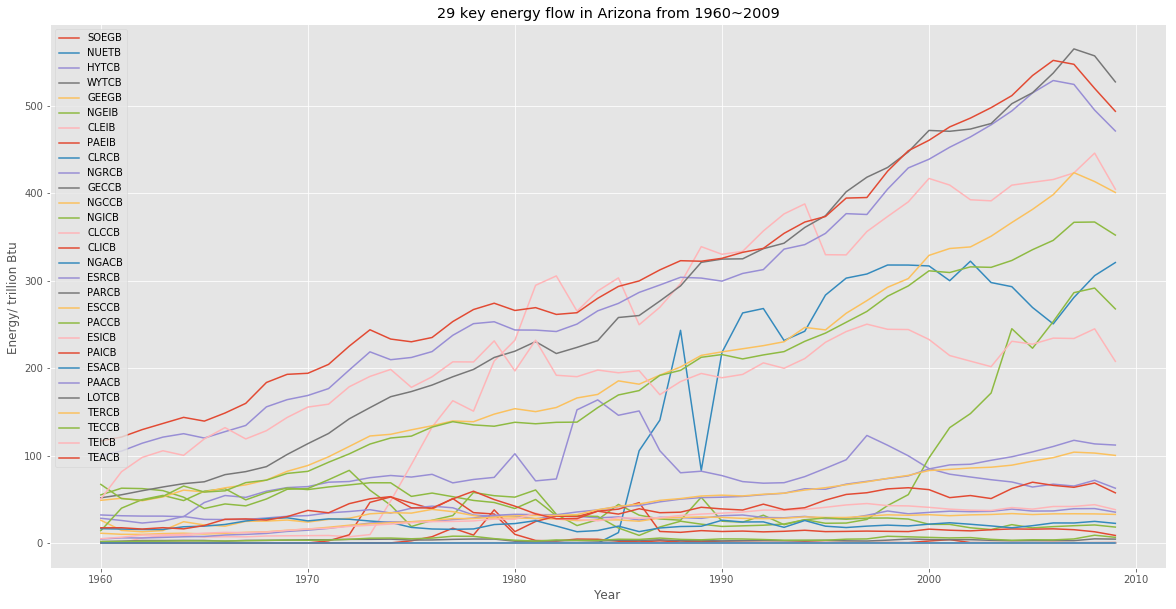

In [558]:
fig, ax = plt.subplots(1,figsize=(20,10))
labels = lines_for_network
for y_arr, label in zip(connect_weight[statename[0]].T, labels):
    plt.plot(y_arr, label=label)
ax.set_title('29 key energy flow in Arizona from 1960~2009')
ax.set_xlabel('Year')
ax.set_ylabel('Energy/ trillion Btu ')
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(6):
    labels[i+1] = str(1960+10*i)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

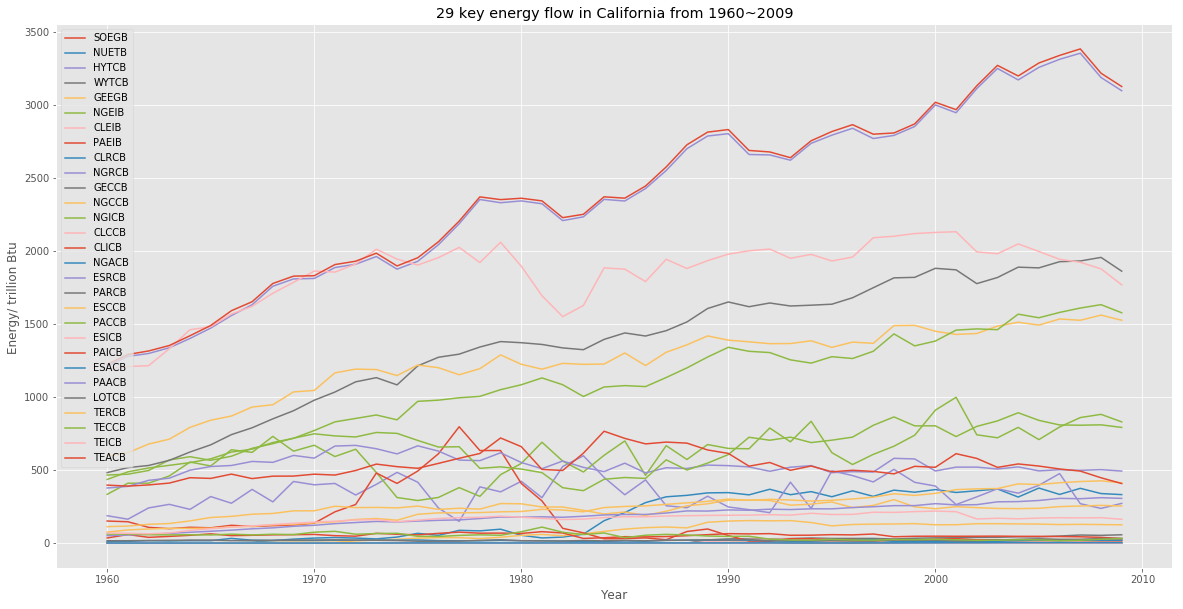

In [559]:
fig, ax = plt.subplots(1,figsize=(20,10))
labels = lines_for_network
for y_arr, label in zip(connect_weight[statename[1]].T, labels):
    plt.plot(y_arr, label=label)
ax.set_title('29 key energy flow in California from 1960~2009')
ax.set_xlabel('Year')
ax.set_ylabel('Energy/ trillion Btu ')
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(6):
    labels[i+1] = str(1960+10*i)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

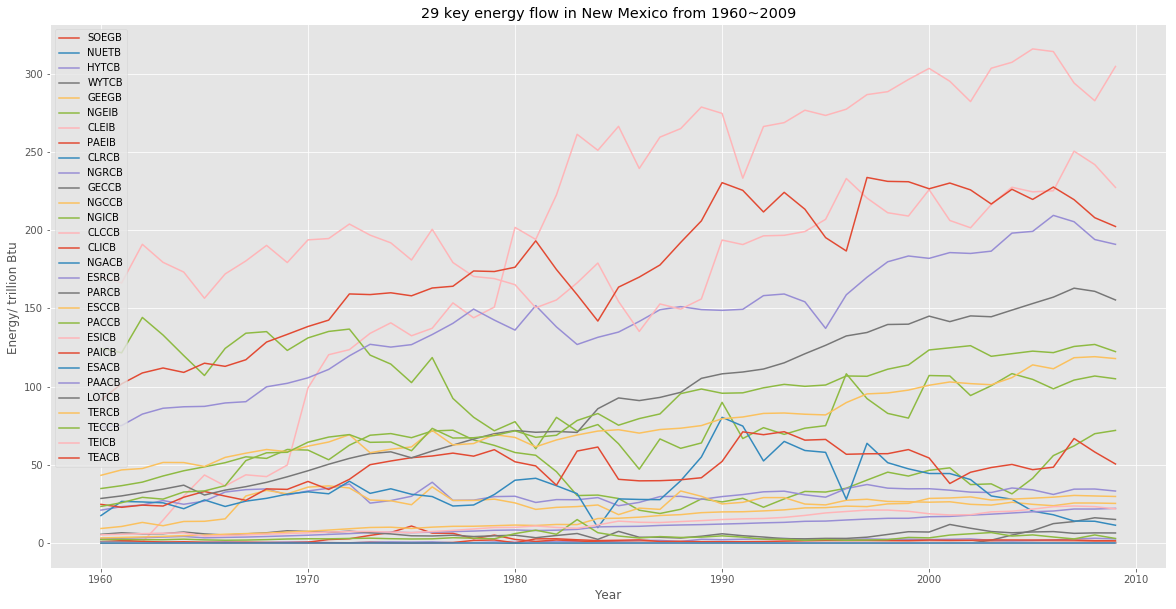

In [560]:
fig, ax = plt.subplots(1,figsize=(20,10))
labels = lines_for_network
for y_arr, label in zip(connect_weight[statename[2]].T, labels):
    plt.plot(y_arr, label=label)
ax.set_title('29 key energy flow in New Mexico from 1960~2009')
ax.set_xlabel('Year')
ax.set_ylabel('Energy/ trillion Btu ')
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(6):
    labels[i+1] = str(1960+10*i)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

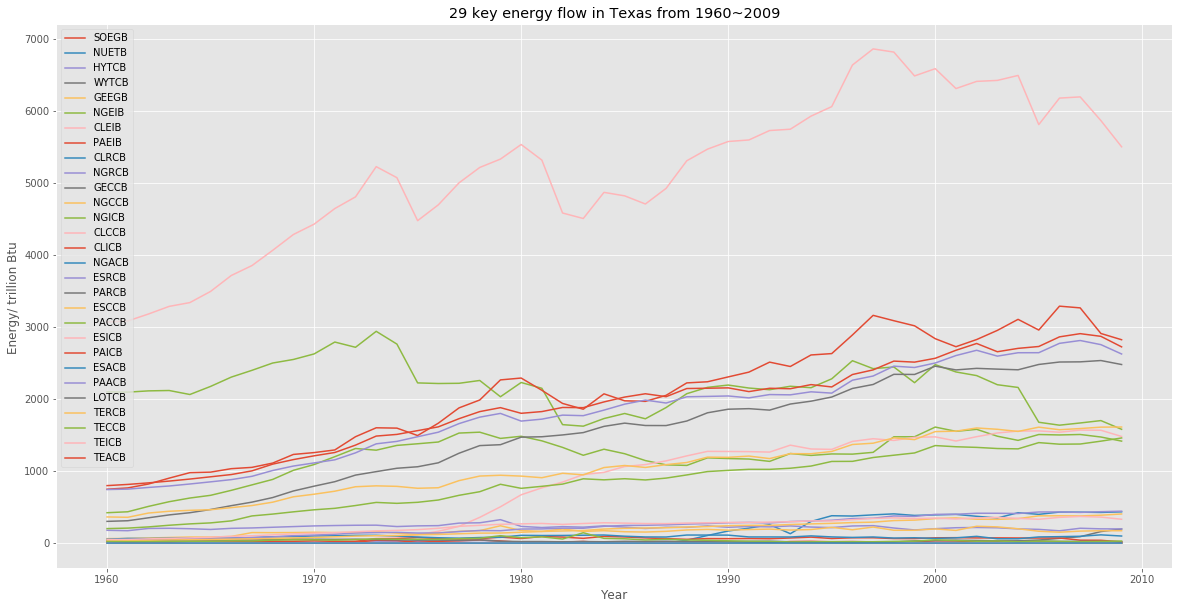

In [561]:
fig, ax = plt.subplots(1,figsize=(20,10))
labels = lines_for_network
for y_arr, label in zip(connect_weight[statename[3]].T, labels):
    plt.plot(y_arr, label=label)
ax.set_title('29 key energy flow in Texas from 1960~2009')
ax.set_xlabel('Year')
ax.set_ylabel('Energy/ trillion Btu ')
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(6):
    labels[i+1] = str(1960+10*i)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

In [562]:
table_2015=pd.read_table('2015_use_all_btu.csv',delimiter=',')

In [563]:
listpcc = []
for i in range(len(lines_for_network)):
    for j in range(4):
        line_2015 = np.array(table_2015[table_2015['State']==statename[j]][table_2015[table_2015['State']==statename[j]]['MSN']==lines_for_network[i]])[0][3:-6].astype('float')
        listpcc.append(pearsonr(line_2015,connect_weight[statename[j]][:,i:(i+1)].ravel())[0])

In [564]:
np.average(np.array(listpcc)[~np.isnan(np.array(listpcc))])

0.99727955115113864

In [565]:
plt.style.use('ggplot')

Text(0.5,0,u'Pearson correlation coefficient')

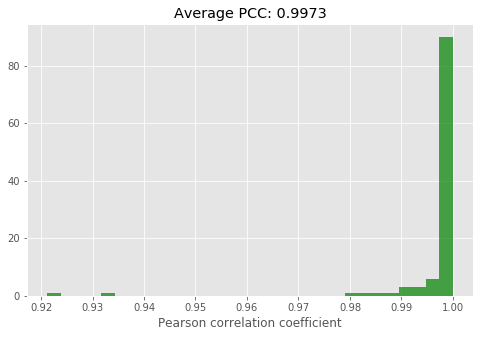

In [567]:
fig, ax = plt.subplots(1,figsize=(8,5))
ax.hist(np.array(listpcc)[~np.isnan(np.array(listpcc))],bins = 30,alpha = 0.7,color='g')
ax.set_title('Average PCC: 0.9973')
ax.set_xlabel('Pearson correlation coefficient')

In [568]:
connect_weight[statename[0]].shape

(50, 29)

## 我们用2010-2015年的数据做验证！可以非常好地检验过拟合！

In [569]:
from numpy import *
def train_test_split(array_,look_back,state_ind,operation):
    '''
    array look back =1 state test count =5 operation: minmaxsclaler
    '''  
    if operation =='min':
        array = np.ndarray([array_[statename[state_ind]].shape[0],array_[statename[state_ind]].shape[1]])
        for i in range(array_[statename[state_ind]].shape[0]):
            array[i]=preprocessing.minmax_scale(array_[statename[state_ind]][i].reshape(-1,1)).ravel()
    elif operation =='norm':
        array = np.ndarray([array_[statename[state_ind]].shape[0],array_[statename[state_ind]].shape[1]])
        for i in range(array_[statename[state_ind]].shape[0]):
            array[i]=preprocessing.normalize((array_[statename[state_ind]][i].reshape(-1,1))).ravel() 
    elif operation =='log':
        array = np.ndarray([array_[statename[state_ind]].shape[0],array_[statename[state_ind]].shape[1]])
        for i in range(array_[statename[state_ind]].shape[1]):
            array[:,i]=ma.log(array_[statename[state_ind]][:,i])
    else:
        array = array_[statename[state_ind]]
        print 'no operation'
    X_whole = np.ndarray([(array.shape[0]-look_back)*look_back,array.shape[1]])
    y_whole = np.ndarray([(array.shape[0]-look_back),array.shape[1]])
    for i in range((array.shape[0]-look_back)):
        X_whole[i*look_back:(i+1)*look_back] = array[i:i+look_back]
        y_whole[i] = array[i+look_back]
    return X_whole,y_whole

In [570]:
connect_weight_2015 = {}
for j in range(4):
    connect_weight_2015[statename[j]] = np.ndarray([6,29])
    for i in range(len(lines_for_network)):  
        connect_weight_2015[statename[j]][:,i] = np.array(table_2015[table_2015['State']==statename[j]][table_2015[table_2015['State']==statename[j]]['MSN']==lines_for_network[i]].iloc[:,-6:])[0].astype('float')

## x_test y_test 从2015读

In [400]:
def Model(model):
    if model=='lr':
        reg = LinearRegression()
    elif model=='xgbr':
        reg = XGBRegressor()
    elif model =='lasso':
        reg = Lasso()
    elif model=='ridge':
        reg = Ridge()
    elif model=='kr':
        reg = KernelRidge(alpha = 10000, kernel = 'polynomial',degree = 3)
    elif model=='knr':
        reg = neighbors.KNeighborsRegressor(n_neighbors=4, algorithm='brute')
    elif model=='rfr':
        reg = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=12, n_jobs=5)
    elif model=='gpr':
        kernel = 1.0 * DotProduct(sigma_0=1.0)**4
        reg = GaussianProcessRegressor(kernel = kernel, optimizer=None)
    elif model=='LSTM':
        reg = Sequential()
        reg.add(LSTM(10, input_shape=(1, 28)))
        reg.add(Dense(28))
        reg.compile(loss='mean_squared_error', optimizer='adam')
        
    return reg
modelname = ['lr','lasso','ridge','kr','knr','rfr','gpr','LSTM']

In [426]:
options = ['NO','log']

In [571]:
def get_metrics(modelname):
    reg = Model(modelname)
    if modelname != 'LSTM':
        reg.fit(x_train,y_train)
        predict = reg.predict(x_test)
    else:
        reg.fit(x_train.reshape(x_train.shape[0],1,-1),y_train, epochs=100, batch_size=1, verbose=2)
        predict = reg.predict(x_test.reshape(x_test.shape[0],1,-1))
    wholepcc = pearsonr(predict.ravel(),y_test.ravel())[0]
    wholer2 = r2_score(predict.ravel(),y_test.ravel())
    pcc= {}
    r2={}
    for i in range(5):
        pcc[i] = pearsonr(predict[i],y_test[i])[0]
        r2[i] = r2_score(predict[i],y_test[i])
    return np.array([wholepcc,pcc[0],pcc[1],pcc[2],pcc[3],pcc[4],wholer2,r2[0],r2[1],r2[2],r2[3],r2[4]])
def metrics(options,state_ind):
    (x_train,y_train) = train_test_split(connect_weight,1,state_ind,options)
    (x_test,y_test) = train_test_split(connect_weight_2015,1,state_ind,options)
    metrics = np.ndarray([8,6])
    for i in range(8):
        metrics[i] = get_metrics(modelname[i])[:6]
    return metrics

In [572]:
def metrics(options,state_ind):
    (x_train,y_train) = train_test_split(connect_weight,1,state_ind,options)
    (x_test,y_test) = train_test_split(connect_weight_2015,1,state_ind,options)
    metrics = np.ndarray([8,6])
    for i in range(8):
        metrics[i] = get_metrics(modelname[i])[:6]
    return metrics

In [573]:
metrics_whole = {}
for i in range(2):
    metrics_whole[i] = {}
    for j in range(4):
        metrics_whole[i][j] = metrics(options[i],j)

no operation
no operation
Epoch 1/100
 - 1s - loss: 12.3380
Epoch 2/100
 - 0s - loss: 10.7799
Epoch 3/100
 - 0s - loss: 8.6358
Epoch 4/100
 - 0s - loss: 7.1717
Epoch 5/100
 - 0s - loss: 6.0849
Epoch 6/100
 - 0s - loss: 5.2029
Epoch 7/100
 - 0s - loss: 4.4800
Epoch 8/100
 - 0s - loss: 3.8786
Epoch 9/100
 - 0s - loss: 3.3810
Epoch 10/100
 - 0s - loss: 2.9675
Epoch 11/100
 - 0s - loss: 2.6198
Epoch 12/100
 - 0s - loss: 2.3340
Epoch 13/100
 - 0s - loss: 2.0982
Epoch 14/100
 - 0s - loss: 1.9016
Epoch 15/100
 - 0s - loss: 1.7417
Epoch 16/100
 - 0s - loss: 1.6095
Epoch 17/100
 - 0s - loss: 1.5016
Epoch 18/100
 - 0s - loss: 1.4152
Epoch 19/100
 - 0s - loss: 1.3426
Epoch 20/100
 - 0s - loss: 1.2848
Epoch 21/100
 - 0s - loss: 1.2366
Epoch 22/100
 - 0s - loss: 1.1914
Epoch 23/100
 - 0s - loss: 1.1421
Epoch 24/100
 - 0s - loss: 1.0678
Epoch 25/100
 - 0s - loss: 1.0154
Epoch 26/100
 - 0s - loss: 0.9715
Epoch 27/100
 - 0s - loss: 0.9248
Epoch 28/100
 - 0s - loss: 0.8879
Epoch 29/100
 - 0s - loss: 0.

 - 0s - loss: 0.7523
Epoch 41/100
 - 0s - loss: 0.7398
Epoch 42/100
 - 0s - loss: 0.7263
Epoch 43/100
 - 0s - loss: 0.7179
Epoch 44/100
 - 0s - loss: 0.7098
Epoch 45/100
 - 0s - loss: 0.7021
Epoch 46/100
 - 0s - loss: 0.6856
Epoch 47/100
 - 0s - loss: 0.6780
Epoch 48/100
 - 0s - loss: 0.6720
Epoch 49/100
 - 0s - loss: 0.6601
Epoch 50/100
 - 0s - loss: 0.6498
Epoch 51/100
 - 0s - loss: 0.6452
Epoch 52/100
 - 0s - loss: 0.6361
Epoch 53/100
 - 0s - loss: 0.6260
Epoch 54/100
 - 0s - loss: 0.6176
Epoch 55/100
 - 0s - loss: 0.6115
Epoch 56/100
 - 0s - loss: 0.5999
Epoch 57/100
 - 0s - loss: 0.5901
Epoch 58/100
 - 0s - loss: 0.5833
Epoch 59/100
 - 0s - loss: 0.5749
Epoch 60/100
 - 0s - loss: 0.5683
Epoch 61/100
 - 0s - loss: 0.5601
Epoch 62/100
 - 0s - loss: 0.5525
Epoch 63/100
 - 0s - loss: 0.5434
Epoch 64/100
 - 0s - loss: 0.5349
Epoch 65/100
 - 0s - loss: 0.5310
Epoch 66/100
 - 0s - loss: 0.5220
Epoch 67/100
 - 0s - loss: 0.5181
Epoch 68/100
 - 0s - loss: 0.5075
Epoch 69/100
 - 0s - loss: 

Epoch 81/100
 - 0s - loss: 0.4651
Epoch 82/100
 - 0s - loss: 0.4605
Epoch 83/100
 - 0s - loss: 0.4576
Epoch 84/100
 - 0s - loss: 0.4582
Epoch 85/100
 - 0s - loss: 0.4510
Epoch 86/100
 - 0s - loss: 0.4513
Epoch 87/100
 - 0s - loss: 0.4443
Epoch 88/100
 - 0s - loss: 0.4476
Epoch 89/100
 - 0s - loss: 0.4426
Epoch 90/100
 - 0s - loss: 0.4391
Epoch 91/100
 - 0s - loss: 0.4361
Epoch 92/100
 - 0s - loss: 0.4307
Epoch 93/100
 - 0s - loss: 0.4290
Epoch 94/100
 - 0s - loss: 0.4278
Epoch 95/100
 - 0s - loss: 0.4299
Epoch 96/100
 - 0s - loss: 0.4210
Epoch 97/100
 - 0s - loss: 0.4159
Epoch 98/100
 - 0s - loss: 0.4219
Epoch 99/100
 - 0s - loss: 0.4125
Epoch 100/100
 - 0s - loss: 0.4060
Epoch 1/100
 - 1s - loss: 12.4176
Epoch 2/100
 - 0s - loss: 10.9895
Epoch 3/100
 - 0s - loss: 9.3760
Epoch 4/100
 - 0s - loss: 7.6106
Epoch 5/100
 - 0s - loss: 5.8822
Epoch 6/100
 - 0s - loss: 4.7071
Epoch 7/100
 - 0s - loss: 3.8602
Epoch 8/100
 - 0s - loss: 3.2222
Epoch 9/100
 - 0s - loss: 2.7268
Epoch 10/100
 - 0s -

Epoch 23/100
 - 0s - loss: 1.2427
Epoch 24/100
 - 0s - loss: 1.2105
Epoch 25/100
 - 0s - loss: 1.1833
Epoch 26/100
 - 0s - loss: 1.1612
Epoch 27/100
 - 0s - loss: 1.1200
Epoch 28/100
 - 0s - loss: 1.0551
Epoch 29/100
 - 0s - loss: 1.0123
Epoch 30/100
 - 0s - loss: 0.9803
Epoch 31/100
 - 0s - loss: 0.9504
Epoch 32/100
 - 0s - loss: 0.9218
Epoch 33/100
 - 0s - loss: 0.8984
Epoch 34/100
 - 0s - loss: 0.8776
Epoch 35/100
 - 0s - loss: 0.8603
Epoch 36/100
 - 0s - loss: 0.8440
Epoch 37/100
 - 0s - loss: 0.8287
Epoch 38/100
 - 0s - loss: 0.8154
Epoch 39/100
 - 0s - loss: 0.8022
Epoch 40/100
 - 0s - loss: 0.7880
Epoch 41/100
 - 0s - loss: 0.7751
Epoch 42/100
 - 0s - loss: 0.7640
Epoch 43/100
 - 0s - loss: 0.7528
Epoch 44/100
 - 0s - loss: 0.7436
Epoch 45/100
 - 0s - loss: 0.7350
Epoch 46/100
 - 0s - loss: 0.7260
Epoch 47/100
 - 0s - loss: 0.7174
Epoch 48/100
 - 0s - loss: 0.7120
Epoch 49/100
 - 0s - loss: 0.7078
Epoch 50/100
 - 0s - loss: 0.6942
Epoch 51/100
 - 0s - loss: 0.6862
Epoch 52/100
 

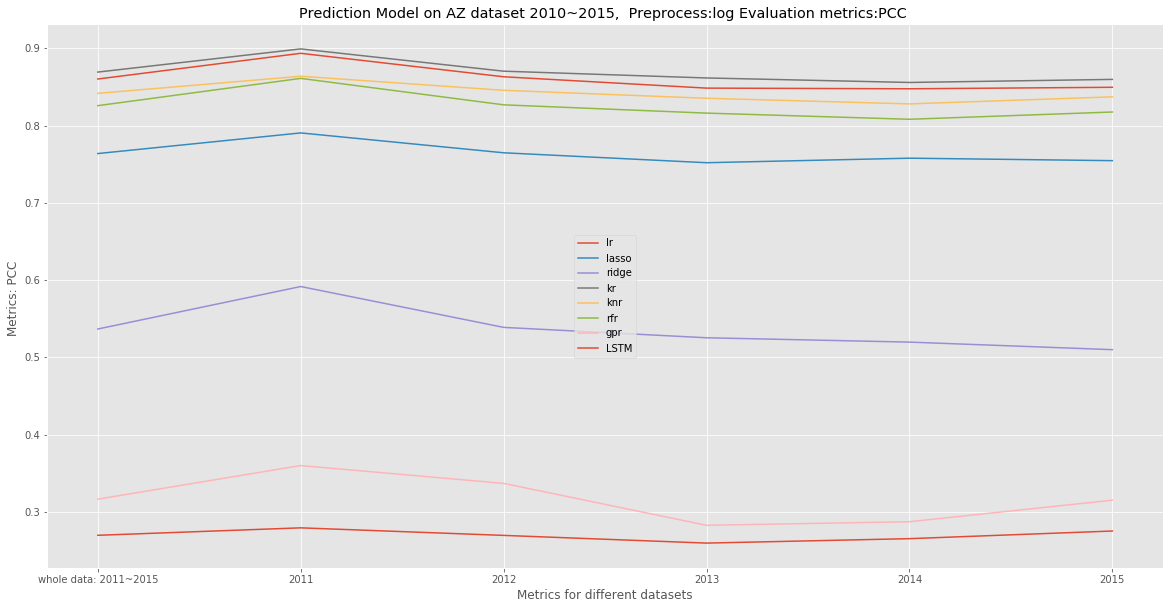

In [576]:
fig, ax = plt.subplots(1,figsize=(20,10))
labels = modelname
for y_arr, label in zip(metrics_whole[0][0], labels):
    plt.plot(y_arr, label=label)
ax.set_title('Prediction Model on '+ statename[0]+' dataset 2010~2015,  Preprocess:'+ options[1]+' Evaluation metrics:PCC ')
ax.set_xlabel('Metrics for different datasets')
ax.set_ylabel('Metrics: PCC ')
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(5):
    labels[i+2] = str(2011+i)
labels[1] = 'whole data: 2011~2015'
ax.set_xticklabels(labels)
plt.legend()
plt.show()

In [591]:
metrics_whole[0][0]

array([[ 0.26952662,  0.27918444,  0.26939353,  0.25942732,  0.2651739 ,
         0.27506095],
       [ 0.76386973,  0.79059325,  0.76487204,  0.75200862,  0.75788232,
         0.75467337],
       [ 0.53665421,  0.5916761 ,  0.53877769,  0.52532374,  0.51969916,
         0.5099146 ],
       [ 0.86937722,  0.89939054,  0.87054865,  0.86176753,  0.85593861,
         0.8599214 ],
       [ 0.84181567,  0.8639873 ,  0.84577901,  0.8354814 ,  0.82816621,
         0.83731704],
       [ 0.82590267,  0.86122633,  0.8269788 ,  0.81623969,  0.80826723,
         0.81767269],
       [ 0.31633503,  0.3598375 ,  0.3367463 ,  0.28244876,  0.28711645,
         0.31499558],
       [ 0.86040544,  0.89368726,  0.86330297,  0.84861947,  0.84776111,
         0.84969411]])

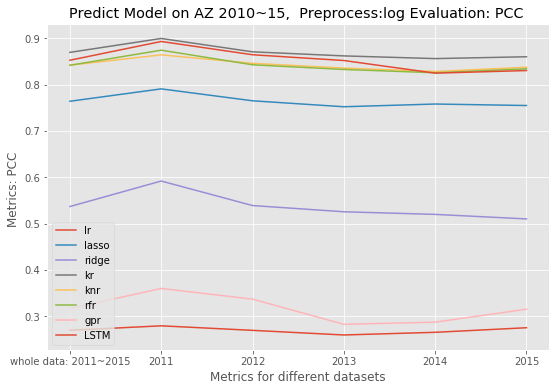

In [1293]:
fig, ax = plt.subplots(1,figsize=(9,6))
labels = modelname
for j in range(1):
    for i in np.arange(1,2):
        for y_arr, label in zip(metrics_whole[i][j], labels):
            ax.plot(y_arr, label=label)
        ax.set_title('Predict Model on '+ statename[j]+' 2010~15,  Preprocess:'+ options[i]+' Evaluation: PCC ')
        ax.set_xlabel('Metrics for different datasets')
        ax.set_ylabel('Metrics: PCC ')
        labelss = [item.get_text() for item in ax.get_xticklabels()]
        for t in range(5):
            labelss[t+2] = str(2011+t)
        labelss[1] = 'whole data: 2011~2015'
        ax.set_xticklabels(labelss)
        ax.legend(loc='lower left')

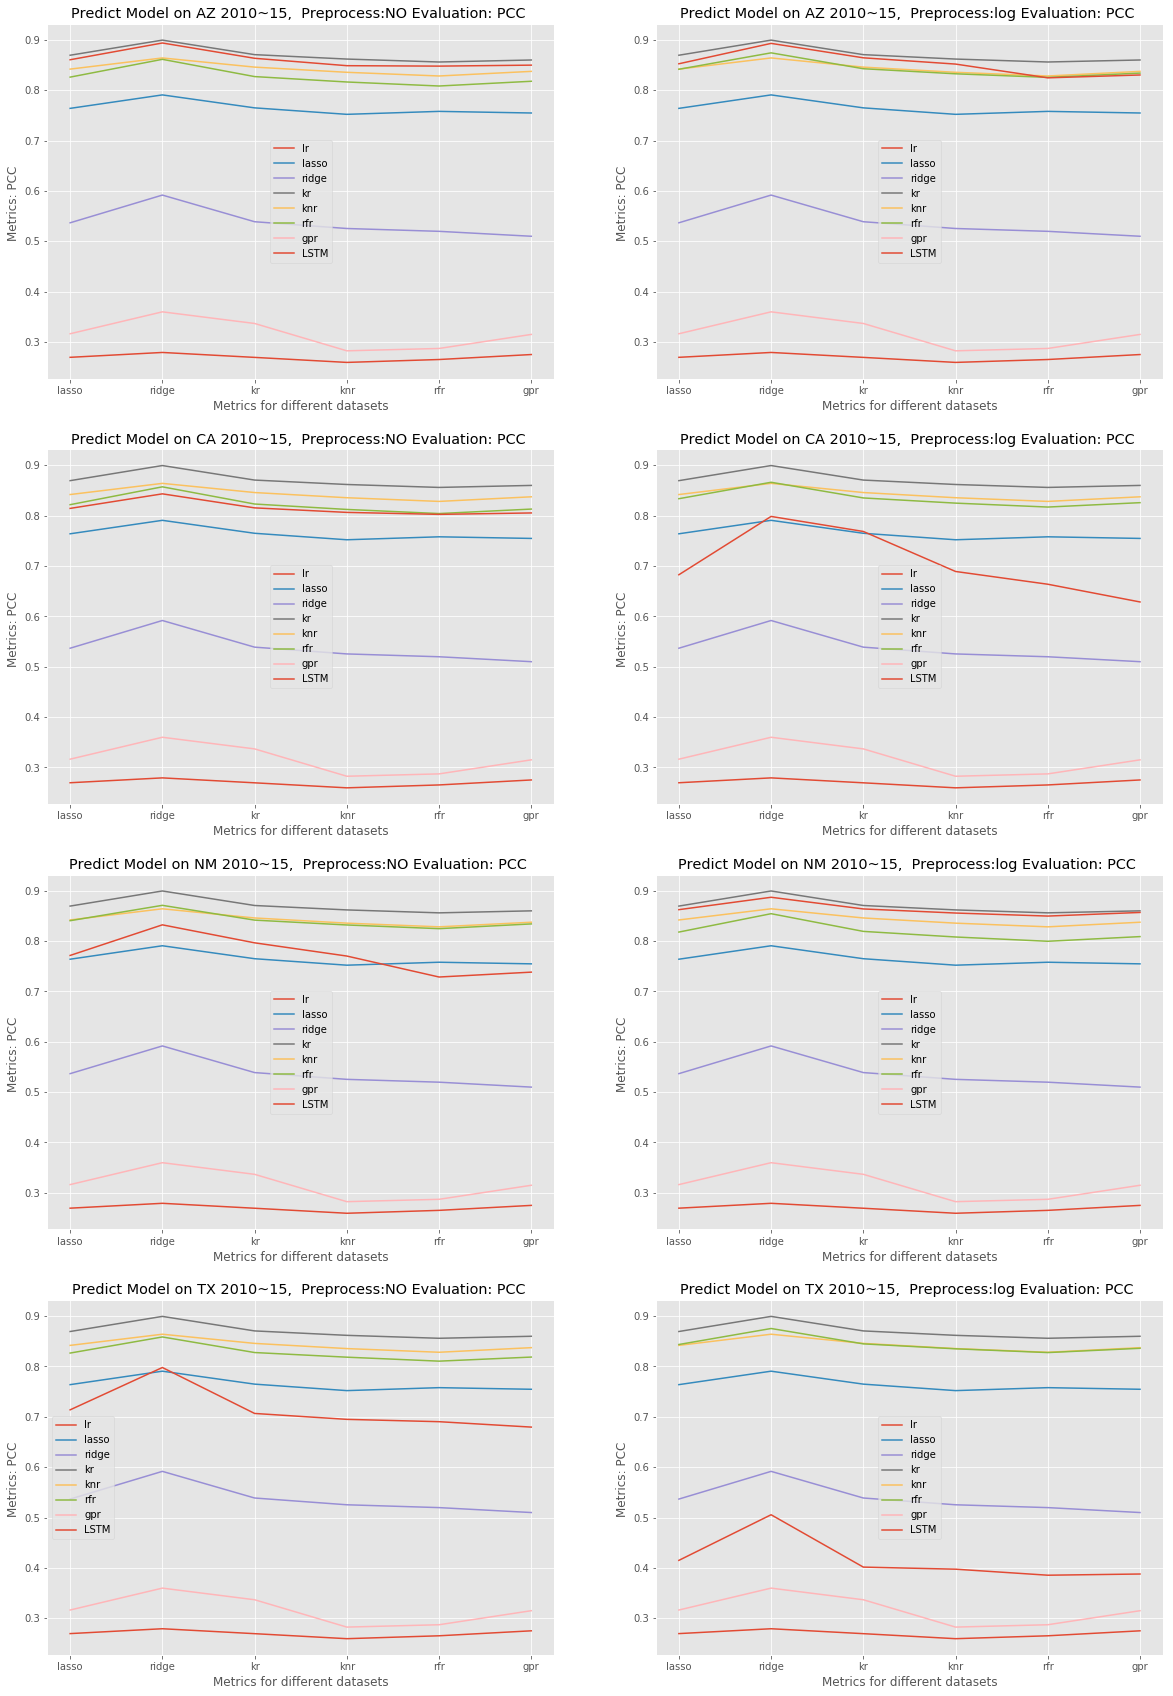

In [582]:
fig, ax = plt.subplots(4,2,figsize=(20,30))
labels = modelname
for j in range(4):
    for i in range(2):
        for y_arr, label in zip(metrics_whole[i][j], labels):
            ax[j,i].plot(y_arr, label=label)
        ax[j,i].set_title('Predict Model on '+ statename[j]+' 2010~15,  Preprocess:'+ options[i]+' Evaluation: PCC ')
        ax[j,i].set_xlabel('Metrics for different datasets')
        ax[j,i].set_ylabel('Metrics: PCC ')
        labelss = [item.get_text() for item in ax[j,i].get_xticklabels()]
        for t in range(5):
            labelss[t+2] = str(2011+t)
        labelss[1] = 'whole data: 2011~2015'
        ax[j,i].set_xticklabels(labels)
        ax[j,i].legend()

In [584]:
model_explain = ['lr', 'lasso', 'ridge']

In [668]:
def get_weight(modelname):
    reg = Model(modelname)
    reg.fit(x_train,y_train)
    return reg.coef_ 

In [669]:
weight = {}
for i in range(3):
    weight[i] = get_weight(model_explain[i])

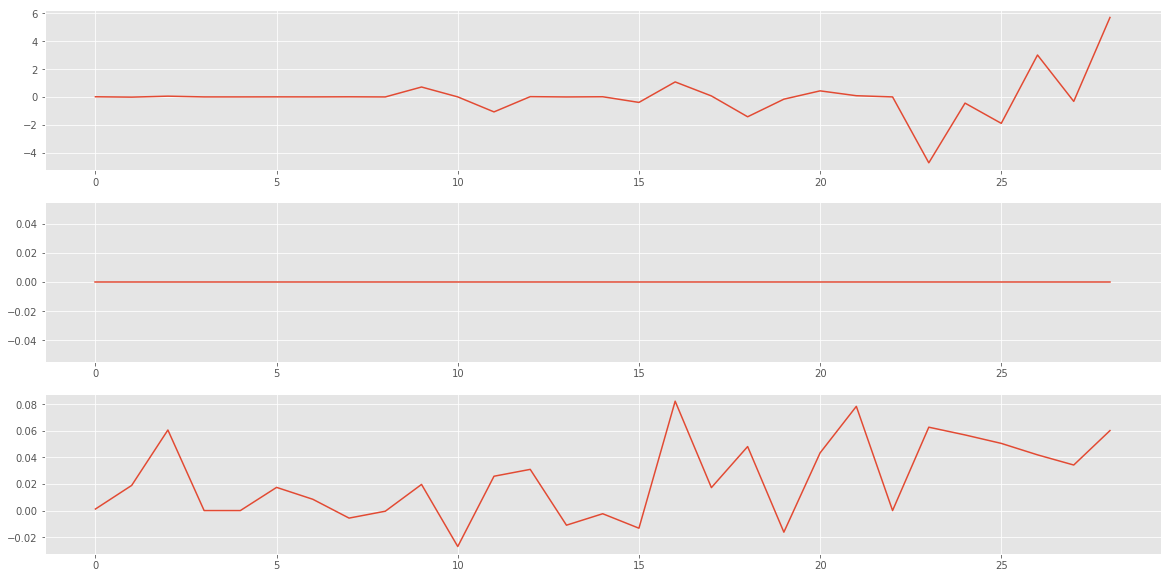

In [670]:
fig, ax = plt.subplots(3,figsize=(20,10))
for j in range(3):
    ax[j].plot(weight[j][-1])

突变石油  画mutate map

In [594]:
(x_train,y_train) = train_test_split(connect_weight,1,0,'log')

In [774]:
lines_for_network[16]

'ESRCB'

In [773]:
lines_for_network

['SOEGB',
 'NUETB',
 'HYTCB',
 'WYTCB',
 'GEEGB',
 'NGEIB',
 'CLEIB',
 'PAEIB',
 'CLRCB',
 'NGRCB',
 'GECCB',
 'NGCCB',
 'NGICB',
 'CLCCB',
 'CLICB',
 'NGACB',
 'ESRCB',
 'PARCB',
 'ESCCB',
 'PACCB',
 'ESICB',
 'PAICB',
 'ESACB',
 'PAACB',
 'LOTCB',
 'TERCB',
 'TECCB',
 'TEICB',
 'TEACB']

In [610]:
mut_matrix = np.ones([49,29])
for i in [17,19,21,23]:
    mut_matrix[:,i] = np.repeat(0.8,49) 

In [626]:
def mutate_map(modelname):
    reg = Model(modelname)
    reg.fit(x_train,y_train)
    predict = reg.predict(np.multiply(x_train,mut_matrix))
    return predict-y_train,y_train,predict

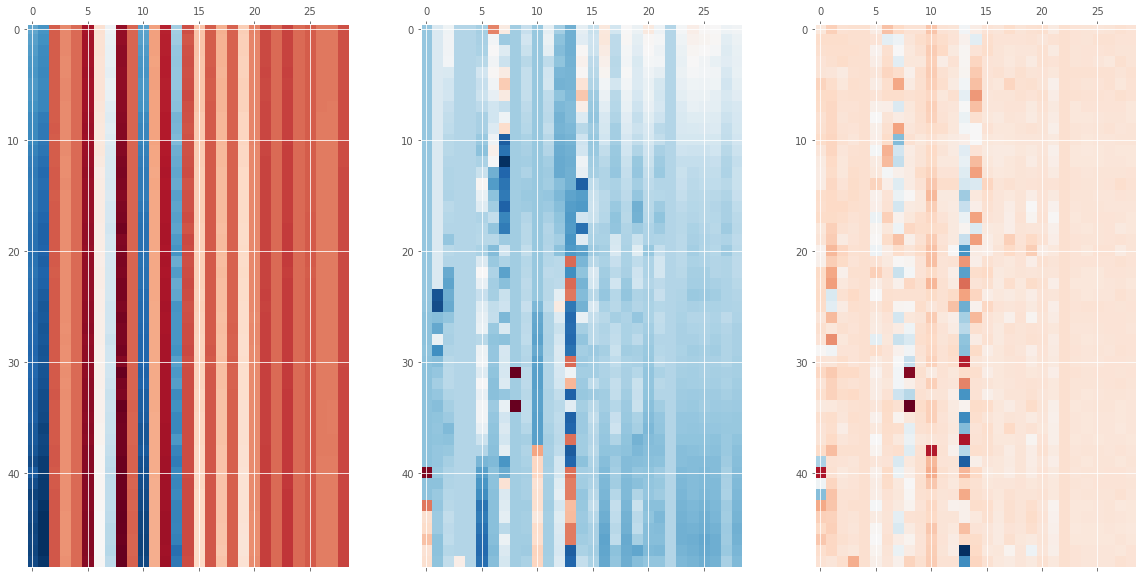

In [622]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
for i in range(3):
    ax[i].matshow(mutate_map(model_explain[i]),cmap = cm.RdBu_r)

In [627]:
for i in range(3):
    for j in range(3):
        with h5py.File('mutmap') as f:
            f.create_dataset(model_explain[i]+str(j),data = mutate_map(model_explain[i])[j])

In [671]:
def get_ratio_change(ind,rowind):
    return ((exp(mutate_map(model_explain[ind])[2]) - exp(mutate_map(model_explain[ind])[1]))/exp(mutate_map(model_explain[ind])[1]))[rowind]

In [672]:
get_ratio_change(2,-1)

array([-0.04946173, -0.14067409,  0.00775503,  1.09098878,  0.        ,
       -0.31976743, -0.13643464, -0.33582351,  0.22866611, -0.0056139 ,
        0.40887387, -0.06687701, -0.0525429 , -0.94056868,  0.19870393,
       -0.03013068, -0.19109676, -0.23374154, -0.14897596, -0.21708907,
       -0.04869717, -0.18188528,  0.        , -0.08434795, -0.12720577,
       -0.14686712, -0.13110558, -0.03723287, -0.07911718])

尝试带约束的优化！

In [1178]:
y

array([ 1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.])

In [1242]:
con1_ind1 = np.concatenate((np.arange(0,16),np.array([17,19,21,23])))
con1_ind2 = [-5,-4,-3,-2,-1]
con2_ind1 = [0,1,2,3,4,5,6,7] 
con2_ind2 = [-5,-7,-9,-11,-13]
con1 = np.zeros(x.shape[1])
con1[con1_ind1] = 1
con1[con1_ind2] = -1
con2 = np.zeros(x.shape[1])
con2[con2_ind1] = 1
con2[con2_ind2] = -1
cond3 = np.arange(0,17)
def func(beta, alpha=0.1):
    """ Objective function: Ridge """
    beta = beta.reshape((x.shape[1], -1))
    e = np.dot(x, beta) - y
    return np.square(e).sum() + alpha*np.square(beta).sum()
def func_deriv(beta, L, alpha=0.1):
    """ Derivative of objective function """
    beta = beta.reshape((x.shape[1], -1))
    return 2*(x.T.dot(x) + alpha*np.identity(x.shape[1])).dot(beta) - 2*x.T.dot(y)
cons = ({'type': 'eq',
        'fun': lambda beta: x.dot(beta.reshape((x.shape[1], -1))).dot(con1)},
       {'type': 'eq',
       'fun': lambda beta: x.dot(beta.reshape((x.shape[1], -1))).dot(con2)}
       #,{'type': 'ineq',
       #'fun': lambda beta: np.abs(x.dot(beta.reshape((x.shape[1], -1)))[:-1,cond3]-x[1:,cond3])/x[1:,cond3] -0.2}
       )
def get_tran(stateind):
    (x_train,y_train) = train_test_split(connect_weight,1,0,'NO')
    return x_train, y_train
def get_ridge_cons(stateind):
    x,y = get_tran(stateind)
    #x[1:,cond3][np.where(x[1:,cond3]==0)] =0.001
    beta = np.zeros((x.shape[1], x.shape[1]))
    res = scipy.optimize.minimize(func, beta, args=(0,), jac=func_deriv,
              constraints=cons, method='SLSQP', options={'disp': True})
    beta_op = res.x.reshape(29,29)
    x_mut = np.multiply(x_train,mut_matrix)
    return x_train.dot(beta_op),y_train,x_mut.dot(beta_op),beta_op

In [1252]:
beta_op = {}
for i in range(4):
    beta_op[i] = get_ridge_cons(i)[3]

no operation
Iteration limit exceeded    (Exit mode 9)
            Current function value: 1795786.90402
            Iterations: 101
            Function evaluations: 1101
            Gradient evaluations: 101
no operation
Iteration limit exceeded    (Exit mode 9)
            Current function value: 1795786.90402
            Iterations: 101
            Function evaluations: 1101
            Gradient evaluations: 101
no operation
Iteration limit exceeded    (Exit mode 9)
            Current function value: 1795786.90402
            Iterations: 101
            Function evaluations: 1101
            Gradient evaluations: 101
no operation
Iteration limit exceeded    (Exit mode 9)
            Current function value: 1795786.90402
            Iterations: 101
            Function evaluations: 1101
            Gradient evaluations: 101


np.abs(x.dot(beta.reshape((x.shape[1], -1)))[:,cond3]-y[:,cond3])/y[:,cond3].shape

fig, ax = plt.subplots(1,4,figsize=(20,10))
for i in range(4):
    ax[i].matshow(get_ridge_cons(i)[2]-get_ridge_cons(i)[1],cmap = cm.RdBu_r)
    ax[i].set_title('mutate profile by petroleum in \n'+statename[i] +' from 1961~2009')

In [1241]:
ridge_cons_result = {}
beta_op = {}
for i in range(4):
    ridge_cons_result[i] = {}
    ridge_cons_result[i][0],ridge_cons_result[i][1],beta_op[i] = get_ridge_cons(i)[2],get_ridge_cons(i)[1],get_ridge_cons(i)[3]

no operation
Iteration limit exceeded    (Exit mode 9)
            Current function value: 1795786.90402
            Iterations: 101
            Function evaluations: 1101
            Gradient evaluations: 101
no operation
Iteration limit exceeded    (Exit mode 9)
            Current function value: 1795786.90402
            Iterations: 101
            Function evaluations: 1101
            Gradient evaluations: 101
no operation
Iteration limit exceeded    (Exit mode 9)
            Current function value: 1795786.90402
            Iterations: 101
            Function evaluations: 1101
            Gradient evaluations: 101


IndexError: tuple index out of range

In [1209]:
x[1:,cond3][np.where(x[1:,cond3]==0)] =1

In [1210]:
x[1:,cond3][np.where(x[1:,cond3]==0)]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [1211]:
x[1:,cond3][np.where(x[1:,cond3]==0)]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [1190]:
x[1:,cond3]

array([[ -1.40000000e-02,  -1.25887800e+02,  -4.62696000e+01,
         -5.80000000e-03,   0.00000000e+00,  -1.38786000e+01,
         -2.28303400e+02,  -7.26460000e+00,  -4.00000000e-04,
         -6.25520000e+00,  -1.02000000e-02,  -1.40458000e+01,
          3.89800000e+00,  -7.20000000e-03,  -1.21284000e+01,
         -4.63880000e+00,  -4.13680000e+01],
       [ -1.40000000e-02,  -1.25887800e+02,  -4.66596000e+01,
         -5.80000000e-03,   0.00000000e+00,  -1.43486000e+01,
         -2.22243400e+02,  -6.81460000e+00,  -4.00000000e-04,
         -9.17520000e+00,  -1.02000000e-02,  -1.55758000e+01,
          1.37180000e+01,  -7.20000000e-03,  -1.21084000e+01,
         -5.16880000e+00,  -4.14980000e+01],
       [ -1.40000000e-02,  -1.25887800e+02,  -4.66896000e+01,
         -5.80000000e-03,   0.00000000e+00,  -1.66586000e+01,
         -2.20033400e+02,  -6.88460000e+00,  -4.00000000e-04,
         -6.97520000e+00,  -1.02000000e-02,  -1.42158000e+01,
          1.84880000e+01,  -7.20000000e-03

In [804]:
for i in range(4):
    for j in range(2):
        with h5py.File('ridge_cons') as f:
            f.create_dataset(str(i)+str(j),data = ridge_cons_result[i][j])

In [805]:
pearsonr(ridge_cons_result[0][1][:,con1_ind2].ravel(),ridge_cons_result[0][0][:,con1_ind2].ravel())

(0.86357157927686612, 3.2342795907706031e-74)

In [788]:
def get_ridge_cons(stateind):
    (x_train,y_train) = train_test_split(connect_weight,1,stateind,'log')
x = x_test
y = y_test
beta = np.zeros((x.shape[1], x.shape[1]))
res = scipy.optimize.minimize(func, beta, args=(0,), jac=func_deriv,
              constraints=cons, method='SLSQP', options={'disp': True})
beta_op = res.x.reshape(29,29)
return x_train.dot(beta_op),y_train

array([[  5.0369526 ,  12.69496549,  11.07606256,   7.18235211,
          0.        ,  12.33685526,  13.01062031,   6.51914729,
          0.        ,  10.55698393,   3.73766962,  10.38834901,
          0.        ,   9.28470545,   9.78436612,  11.61469655,
          8.43207094,  11.50037706,   9.0894149 ,  10.57234204,
         10.94093341,   0.        ,  13.01129549,  13.09191036,
         12.83754653,  12.71855789,  12.23968149,  13.05020765],
       [  6.67203295,  12.69860802,  11.39790735,   7.81722279,
          0.        ,  12.12212566,  13.01675394,   6.32076829,
          0.        ,  10.57372428,   3.91202301,  10.40598862,
          0.        ,   9.21243817,   9.61999668,  11.63395655,
          8.56655462,  11.51986136,   9.0822797 ,  10.64889506,
         11.01992339,   0.        ,  13.00615984,  13.14930906,
         12.87611239,  12.7581832 ,  12.31806562,  13.03943819],
       [  9.11052004,  12.72079865,  11.06535629,   8.52892411,
          0.        ,  12.36165658,  1

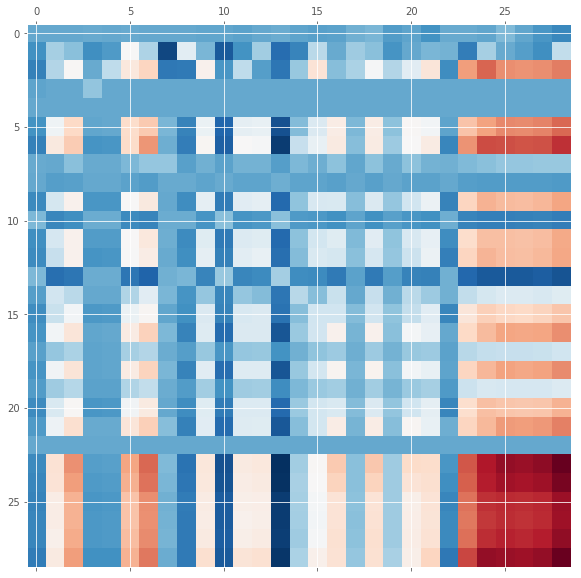

In [824]:
fig, ax = plt.subplots(1,figsize=(10,10))
ax.matshow(beta_op,cmap = cm.RdBu_r)

In [827]:
connect_weight['AZ'].shape

(50, 29)

In [1114]:
from sklearn.decomposition import PCA  
pca=PCA(n_components=2,copy=False) 

In [842]:
pca.fit_transform(connect_weight['AZ'][0].reshape(1,-1))

array([[ 0.]])

In [847]:
all_state = pd.read_table('completeseds19602009.csv',delimiter=',')

In [850]:
all_name = np.unique(all_state['StateCode']).astype('str')

In [866]:
all_state.head()

,MSN,StateCode,Year,Data
0,ABICB,AK,1960,0.0
1,ABICB,AK,1961,0.0
2,ABICB,AK,1962,0.0
3,ABICB,AK,1963,0.0
4,ABICB,AK,1964,0.0


In [1077]:
def get_year_connect_weight(statename,years):
    valuee_ = get_year_state_network_data(statename,years,all_state)
    connect_weight = np.array(list(valuee_[:-6])+[valuee_[-6],valuee_[-4],valuee_[-3],valuee_[-2],valuee_[-1]])
    return connect_weight
connect_weight = {}
for j in np.arange(0,50):
    connect_weight[all_name[j]]=np.ndarray([50,29])
    for i in range(50):
        connect_weight[all_name[j]][i] = get_year_connect_weight(all_name[j],1960+i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [1139]:
connect_weight_ = np.ndarray([50,50,29])
for j in range(50):
    for i in range(50):
        connect_weight_[j:(j+1),i:(i+1),:]=get_year_connect_weight(all_name[j],1960+i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [1147]:
pca.fit_transform(scaler.fit_transform(connect_weight_[3].T).T)[:,0:1]

array([[ 0.71191664],
       [ 0.81630987],
       [ 0.81562197],
       [ 0.80045445],
       [ 0.75179469],
       [ 0.80298825],
       [ 0.80457381],
       [ 0.75394216],
       [ 0.76743672],
       [ 0.75731989],
       [ 0.73533814],
       [ 0.71689045],
       [ 0.71370286],
       [ 0.68743005],
       [ 0.5461783 ],
       [ 0.36026989],
       [ 0.24454728],
       [ 0.1943135 ],
       [ 0.25226996],
       [ 0.11526412],
       [-0.00628685],
       [-0.05203802],
       [-0.08199528],
       [-0.12794476],
       [-0.11730705],
       [-0.18075096],
       [-0.24868405],
       [-0.35610059],
       [-0.55508036],
       [-0.36149872],
       [-0.6033066 ],
       [-0.6647382 ],
       [-0.62376495],
       [-0.55218496],
       [-0.56192474],
       [-0.57192476],
       [-0.53355155],
       [-0.54119019],
       [-0.56703625],
       [-0.55635696],
       [-0.55991451],
       [-0.5233529 ],
       [-0.50239234],
       [-0.45325234],
       [-0.43248831],
       [-0

with h5py.File('connet_weight_all') as f:
    for i in range(50):
        f.create_dataset(all_name[i],data = connect_weight[all_name[i]])

In [1148]:
concatearr = np.ndarray([50,50])
pcalist = []
for i in range(50):
    concatearr[:,i:(i+1)] = pca.fit_transform(scaler.fit_transform(connect_weight_[i].T).T)[:,0:1]
    pcalist.append(pca.explained_variance_ratio_)

In [1149]:
concatearr

array([[ 0.72450347, -0.47766441, -0.53891876, ...,  0.7817808 ,
        -0.28444812,  0.48811189],
       [ 0.71285012, -0.40367608, -0.51995674, ...,  0.85362514,
        -0.295198  ,  0.49411388],
       [ 0.67702152, -0.37622108, -0.52667024, ...,  0.85056172,
        -0.30392675,  0.47837798],
       ..., 
       [-0.24161326,  0.41795872,  0.44321268, ..., -0.41633198,
         0.48559524, -0.38791577],
       [-0.25758438,  0.45084382,  0.50383165, ..., -0.47816704,
         0.46874037, -0.42819972],
       [-0.34337914,  0.5629523 ,  0.60784331, ..., -0.40786186,
         0.56968567, -0.4814047 ]])

fig, ax = plt.subplots(1,figsize=(6,4))
ax.set_title('first principal component explained ratio of \n 29 variables in energy flow profile  in each 50 states')
hist(np.array(pcalist),bins = 30,alpha = 0.6,color = 'blue')
ax.set_xlabel('explained_ratio')

In [1094]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scaler = MinMaxScaler()
rout = RobustScaler()

In [951]:
state_ind_inall = [3,4,32,43]

In [1155]:
pca_fourstates = scaler.fit_transform(concatearr.T).T[:,state_ind_inall]

In [1152]:
scaler.fit_transform(concatearr.T).T

array([[ 0.8986395 ,  0.17455205,  0.13765745, ...,  0.93313867,
         0.29092971,  0.75625657],
       [ 0.88901112,  0.20376659,  0.13240177, ...,  0.97540883,
         0.27034274,  0.75476634],
       [ 0.84406025,  0.20004399,  0.10805028, ...,  0.95017323,
         0.24424913,  0.72259757],
       ..., 
       [ 0.29507546,  0.72755854,  0.74411763, ...,  0.18051194,
         0.77190798,  0.19914452],
       [ 0.29384119,  0.76381643,  0.79896885, ...,  0.14750542,
         0.7756891 ,  0.18065402],
       [ 0.2091591 ,  0.72850283,  0.75422617, ...,  0.17220937,
         0.73236117,  0.13006804]])

In [1113]:
((concatearr[0] -np.percentile(concatearr[0],0))/( np.percentile(concatearr[0],100) -\
np.percentile(concatearr[0],0)))[state_ind_inall]

array([ 0.0375455 ,  0.13763179,  0.06477519,  0.18375   ])

In [1156]:
pca_fourstates

array([[ 0.89105822,  0.62576235,  0.99915564,  0.70960554],
       [ 0.95250737,  0.58958407,  0.99086408,  0.69945395],
       [ 0.92880895,  0.57060531,  0.97891857,  0.66547154],
       [ 0.96938999,  0.63810355,  0.98060709,  0.68830716],
       [ 0.91501433,  0.63878282,  0.89228802,  0.66013418],
       [ 0.97459713,  0.65419425,  0.85945776,  0.68446964],
       [ 0.9335052 ,  0.61144329,  0.8692977 ,  0.65246955],
       [ 0.93850483,  0.6265801 ,  0.88862401,  0.66633468],
       [ 0.98326528,  0.61734919,  0.91417917,  0.6766095 ],
       [ 0.98832327,  0.63063415,  0.87454312,  0.6604475 ],
       [ 1.        ,  0.64619557,  0.75784873,  0.66860563],
       [ 1.        ,  0.643133  ,  0.69387862,  0.67537353],
       [ 1.        ,  0.64692698,  0.69000215,  0.6388162 ],
       [ 1.        ,  0.67097234,  0.62283545,  0.64574948],
       [ 0.92990313,  0.682433  ,  0.58935031,  0.63701351],
       [ 0.67198319,  0.56647563,  0.49497755,  0.48055988],
       [ 0.71982465,  0.

In [869]:
def get_parameters(state,mscode):
    return np.array(all_state[all_state['StateCode'] ==state][all_state[all_state['StateCode'] ==state]['MSN'] ==mscode]['Data'])

In [1036]:
def five_paras(ind):  
    array_ = np.ndarray([50,5])
    statename=all_name[ind]
    #人均能源
    array_[:,0] = get_parameters(statename,'TETPB')
    #单位美元能源消费
    array_[:,1] = get_parameters(statename,'TETCB')/np.concatenate((prev_gdp[ind],get_parameters(statename,'GDPRX')))
    #电力占总
    array_[:,2] = get_parameters(statename,'ESTCB')/get_parameters(statename,'TETCB')
    #化石占总
    array_[:,3] = get_parameters(statename,'FFTCB')/get_parameters(statename,'TETCB')
    #可再生占总
    array_[:,4] = get_parameters(statename,'RETCB')/get_parameters(statename,'TETCB')
    return array_

In [1037]:
five_paras(0).shape

(50, 5)

In [ ]:
gdparr = np.ndarray([50,33])
for i in range(50):
    gdparr[i] = get_parameters(all_name[i],'GDPRX')
av_gdp = []
for i in range(50):
    av_gdp.append(((gdparr[i][1:] - gdparr[i][:-1])/gdparr[i][:-1]).sum()/33.0)
((gdparr[i][1:] - gdparr[i][:-1])/gdparr[i][:-1]).sum()
pre_gdp_ = np.ndarray([50,17])
for i in range(50):
    pre_gdp_[i] = 1+ np.array([2.5, 2.3, 6.1, 4.4, 5.8, 6.4, 6.5, 2.5, 4.8, 3.1, 0.2, 3.4, 5.3, 5.8,
 -0.6, -0.2, 5.4])*0.3*0.01 + np.array(av_gdp )[i]*0.7
prev_gdp = np.ndarray([50,17])
for i in range(50):
    nowgdp = gdparr[:,0][i]
    for j in range(17):
        nowgdp =nowgdp/pre_gdp_[i][16-j]
        prev_gdp[i][16-j] =nowgdp

In [1038]:
five = {}
for i in range(50):
    five[i] =five_paras(i)

In [1279]:
state_sqe = [3,4,32,43]

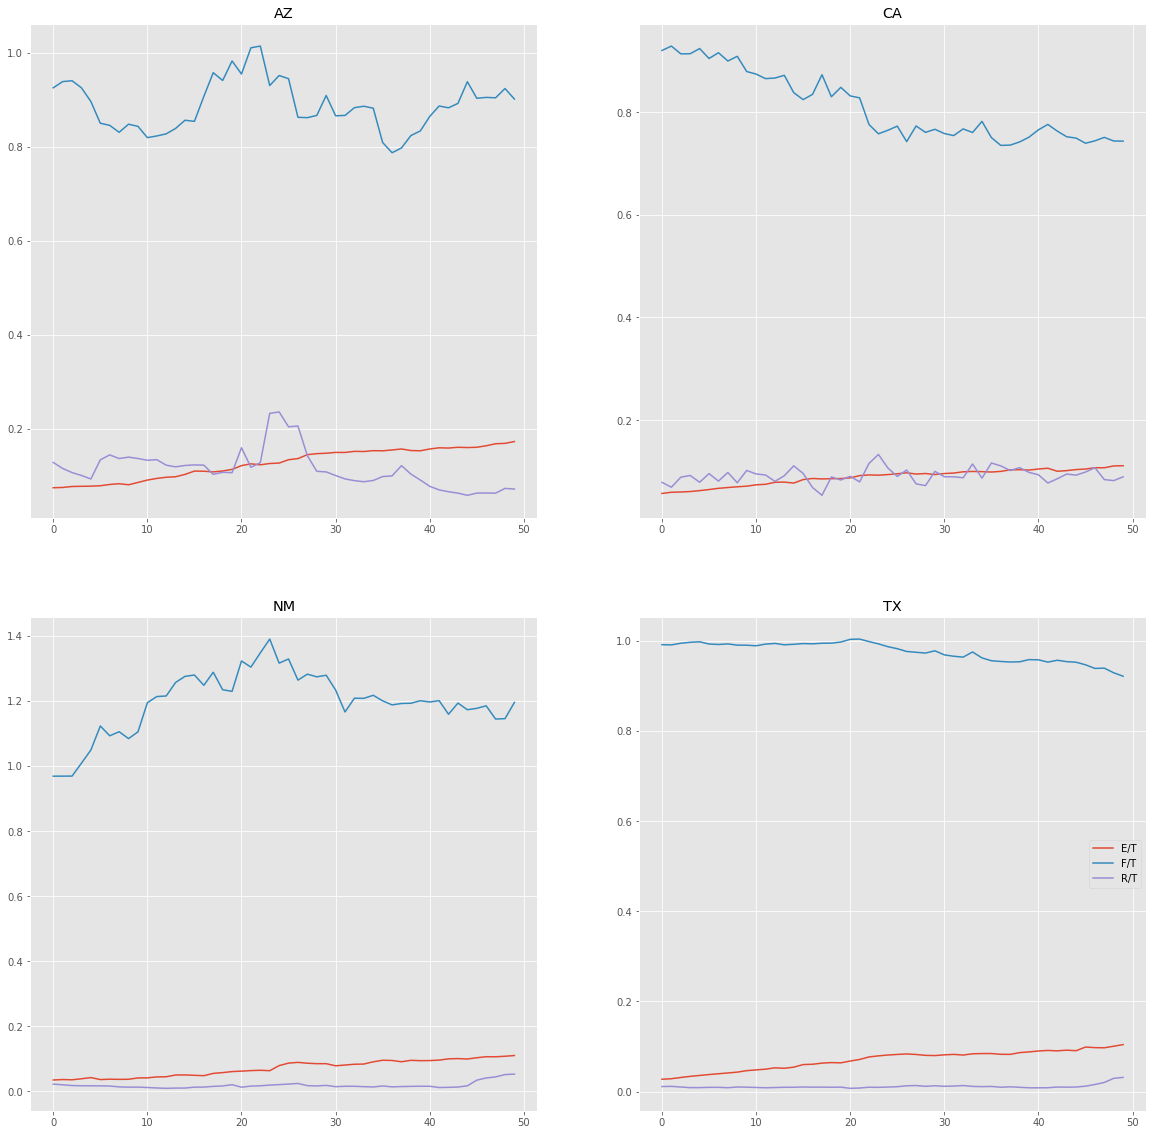

In [1280]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
for i in range(2):
    for j in range(2):
        labels = ['E/T','F/T','R/T']
        for y_arr, label in zip(five[state_sqe[i*2+j]][:,2:].T, labels):
            ax[i,j].plot(y_arr, label=label)
        ax[i,j].set_title(statename[i*2+j])
plt.legend()
plt.show()

In [1287]:
aaaa = np.ndarray([12,50])
for i in range(4):
    aaaa[i*3:(i+1)*3,:] = five[state_sqe[i]][:,2:].T

In [1288]:
np.savetxt('fourstatesthreeind',aaaa)

In [1284]:
five[state_sqe[i]][:,2:].T.shape

(3, 50)

[3,4,32,43]

In [1039]:
five_ = {}
for i in range(50):
    five_[i] = np.ndarray([50,5])

def sca(i,j):
    '''
    i 50 j 5
    '''
    arr = np.ndarray([50,1])
    for t in range(50):
        arr[t] = five[t][i,j] 
    a_ = scaler.fit_transform(arr)
    return a_

for t in range(50):
    for i in range(50):
        for j in range(5):
            five_[t][i,j] = sca(i,j)[t]

In [1066]:
azfac = np.concatenate((five_[3],pca_fourstates[:,0:1]),axis =1)
cafac = np.concatenate((five_[4],pca_fourstates[:,1:2]),axis =1)
nmfac = np.concatenate((five_[32],pca_fourstates[:,2:3]),axis =1)
txfac = np.concatenate((five_[43],pca_fourstates[:,3:4]),axis =1)

In [1067]:
with h5py.File('sixfactors') as f:
    f.create_dataset(str(0),data = azfac)
    f.create_dataset(str(1),data = cafac)
    f.create_dataset(str(2),data = nmfac)
    f.create_dataset(str(3),data = txfac)

In [1158]:
with h5py.File('50states_factors') as f:
    for i in range(50):
        f.create_dataset(str(i),data = five_[i])

In [1215]:
beta_op

array([[  6.68298674e-03,  -3.24376265e-02,  -6.03754606e-03,
         -1.49512913e-02,  -7.31467884e-03,  -1.93007685e-02,
         -1.97483828e-02,  -9.91496488e-03,   9.87808924e-03,
         -2.54298806e-02,  -2.19807017e-04,   1.87949965e-04,
          1.32782558e-02,  -3.52078313e-02,  -2.12838785e-03,
         -6.04763844e-03,  -2.53439253e-02,  -3.33585969e-03,
         -1.02913287e-02,  -2.13444628e-02,  -1.00959537e-02,
         -2.72127837e-03,  -4.67121044e-03,  -2.55195111e-02,
         -5.26198392e-02,  -3.77710374e-02,  -2.50511625e-02,
         -2.36623943e-02,  -6.25281902e-02],
       [ -4.69641230e-03,   9.95399099e-02,  -7.98699110e-03,
         -1.30670744e-02,  -1.29682774e-02,   4.59551269e-02,
          7.40052976e-02,  -2.49975196e-02,  -1.21266064e-02,
          4.04303799e-02,   1.88761599e-03,  -3.23713882e-03,
          6.15561815e-03,  -6.71306656e-03,   6.92610867e-03,
         -3.81845125e-03,   1.69050185e-02,   1.32057668e-02,
          2.34579492e-02,

In [ ]:
def get_metrics(modelname):
    reg = Model(modelname)
    if modelname != 'LSTM':
        reg.fit(x_train,y_train)
        predict = reg.predict(x_test)
    else:
        reg.fit(x_train.reshape(x_train.shape[0],1,-1),y_train, epochs=100, batch_size=1, verbose=2)
        predict = reg.predict(x_test.reshape(x_test.shape[0],1,-1))
    wholepcc = pearsonr(predict.ravel(),y_test.ravel())[0]
    wholer2 = r2_score(predict.ravel(),y_test.ravel())
    pcc= {}
    r2={}
    for i in range(5):
        pcc[i] = pearsonr(predict[i],y_test[i])[0]
        r2[i] = r2_score(predict[i],y_test[i])
    return np.array([wholepcc,pcc[0],pcc[1],pcc[2],pcc[3],pcc[4],wholer2,r2[0],r2[1],r2[2],r2[3],r2[4]])
def metrics(options,state_ind):
    (x_train,y_train) = train_test_split(connect_weight,1,state_ind,options)
    (x_test,y_test) = train_test_split(connect_weight_2015,1,state_ind,options)
    metrics = np.ndarray([8,6])
    for i in range(8):
        metrics[i] = get_metrics(modelname[i])[:6]
    return metrics

In [1227]:
(x_train,y_train) = train_test_split(connect_weight,1,0,'NO')

no operation


In [1219]:
x_train.shape

(49, 29)

In [1230]:
with h5py.File('datasets') as f:
    for i in range(4):
        f.create_dataset('x'+str(i),data = train_test_split(connect_weight,1,i,'NO')[0])
        f.create_dataset('y'+str(i),data = train_test_split(connect_weight,1,i,'NO')[1])

no operation
no operation
no operation
no operation
no operation
no operation
no operation
no operation


In [1229]:
x_train

array([[  0.00000000e+00,   0.00000000e+00,   3.21700000e+01, ...,
          6.71400000e+01,   5.04100000e+01,   1.16690000e+02],
       [  0.00000000e+00,   0.00000000e+00,   3.12500000e+01, ...,
          5.08600000e+01,   8.15900000e+01,   1.21240000e+02],
       [  0.00000000e+00,   0.00000000e+00,   3.08600000e+01, ...,
          4.89700000e+01,   9.79600000e+01,   1.29740000e+02],
       ..., 
       [  1.30000000e-01,   2.50590000e+02,   6.73800000e+01, ...,
          3.46070000e+02,   2.34300000e+02,   5.51810000e+02],
       [  9.00000000e-02,   2.80810000e+02,   6.52100000e+01, ...,
          3.66730000e+02,   2.33890000e+02,   5.47350000e+02],
       [  1.50000000e-01,   3.05760000e+02,   7.18000000e+01, ...,
          3.67050000e+02,   2.44950000e+02,   5.19770000e+02]])

In [1228]:
connect_weight['AZ']

array([[  0.00000000e+00,   0.00000000e+00,   3.21700000e+01, ...,
          6.71400000e+01,   5.04100000e+01,   1.16690000e+02],
       [  0.00000000e+00,   0.00000000e+00,   3.12500000e+01, ...,
          5.08600000e+01,   8.15900000e+01,   1.21240000e+02],
       [  0.00000000e+00,   0.00000000e+00,   3.08600000e+01, ...,
          4.89700000e+01,   9.79600000e+01,   1.29740000e+02],
       ..., 
       [  9.00000000e-02,   2.80810000e+02,   6.52100000e+01, ...,
          3.66730000e+02,   2.33890000e+02,   5.47350000e+02],
       [  1.50000000e-01,   3.05760000e+02,   7.18000000e+01, ...,
          3.67050000e+02,   2.44950000e+02,   5.19770000e+02],
       [  1.40000000e-01,   3.20720000e+02,   6.27300000e+01, ...,
          3.52100000e+02,   2.07760000e+02,   4.93620000e+02]])

In [1263]:
with h5py.File('beta_') as f:
    f.create_dataset('beta',data = beta_op)

In [1254]:
beta_op = np.array([val for (key,val) in beta_op.iteritems()])

In [1253]:
beta_op.iteritems()

<dictionary-itemiterator at 0x7f8b61e766d8>

In [1255]:
beta_op.astype('float')

array([[[ 0.00668299, -0.03243763, -0.00603755, ..., -0.02505116,
         -0.02366239, -0.06252819],
        [-0.00469641,  0.09953991, -0.00798699, ...,  0.04823314,
          0.03242738,  0.08905078],
        [-0.00380804, -0.00841533, -0.00937156, ..., -0.00142455,
          0.02704618, -0.01751618],
        ..., 
        [-0.00858416,  0.05630447, -0.01803304, ...,  0.06624858,
          0.00171615,  0.05582966],
        [ 0.01905235, -0.03203001, -0.0122615 , ..., -0.0168304 ,
         -0.0096338 ,  0.00189164],
        [-0.00863165,  0.08098178, -0.0039687 , ...,  0.07234165,
          0.02753761,  0.08737635]],

       [[ 0.00668299, -0.03243763, -0.00603755, ..., -0.02505116,
         -0.02366239, -0.06252819],
        [-0.00469641,  0.09953991, -0.00798699, ...,  0.04823314,
          0.03242738,  0.08905078],
        [-0.00380804, -0.00841533, -0.00937156, ..., -0.00142455,
          0.02704618, -0.01751618],
        ..., 
        [-0.00858416,  0.05630447, -0.01803304, ...,